In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2]:
# 2. Load and Preprocess the Data
df = pd.read_csv('Housing.csv')

# Encode categorical features
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [3]:
# 3. Define Features and Target Variable
X = df.drop('price', axis=1)
y = df['price']


In [4]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# 5. Fit Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [6]:
# 6. Predict and Evaluate
y_pred = lr_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')


MAE: 979679.6912959901
MSE: 1771751116594.0352
R² Score: 0.6494754192267803


In [7]:
# 7. Interpret Coefficients
coeff_df = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


                   Coefficient
area              2.358488e+02
bedrooms          7.857449e+04
bathrooms         1.097117e+06
stories           4.062232e+05
mainroad          3.668242e+05
guestroom         2.331468e+05
basement          3.931598e+05
hotwaterheating   6.878813e+05
airconditioning   7.855506e+05
parking           2.257565e+05
prefarea          6.299017e+05
furnishingstatus -2.103971e+05


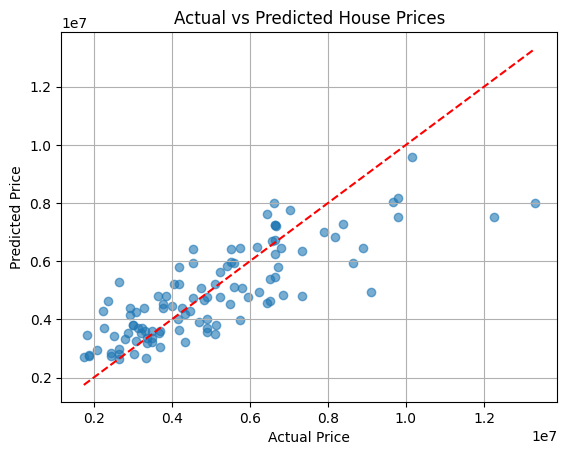

In [8]:
# 8. Plot Actual vs Predicted Prices
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # identity line
plt.show()
